In [11]:
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

In [13]:
def expected_profit(p, mean, sd, c):
    prob = 1-norm.cdf(p, mean, sd)
    return (p-c)*prob
def neg_expected_profit(p, mean, sd, c):
    return -expected_profit(p, mean, sd, c)

def best_p(mean, sd, c):
    res = minimize_scalar(neg_expected_profit, args=(mean, sd, c), bounds=(0,35), method='bounded')
    optimal_p = res.x
    return optimal_p

def maximal(mean, sd, c):
    res = minimize_scalar(neg_expected_profit, args=(mean, sd, c), bounds=(0,35), method='bounded')
    return -res.fun

In [15]:
mylist = []
# set constants
c = 7
min_mu, max_mu = -3, 10
min_sd, max_sd = 3, 15
# add sample of means and standard deviations to a data frame
for mu in range(min_mu, max_mu):
    for sd in range(min_sd, max_sd):
        mylist.append((mu,sd))
dframe = pd.DataFrame(mylist, columns = ["mu", "sd"])

# calculate the best price and expected profit
dframe["best_price"] = dframe.apply(lambda row: best_p(row["mu"], row["sd"], c), axis=1)
dframe["expected_profit"] = dframe.apply(lambda row: maximal(row["mu"], row["sd"], c), axis=1)
# show a random sample of ten values of mean and standard deviation to show a relationship
dframe.sample(10)

,mu,sd,best_price,expected_profit
126,7,9,13.766124,1.529741
140,8,11,15.579344,2.105386
78,3,9,12.676021,0.801238
71,2,14,16.133682,1.428104
122,7,5,10.758957,0.849856
8,-3,11,12.829399,0.437614
119,6,14,17.227142,2.160936
39,0,6,9.902120,0.143467
125,7,8,13.014332,1.359770
108,6,3,8.975504,0.317343


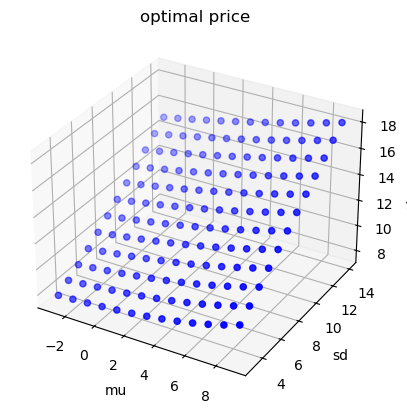

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dframe["mu"], dframe["sd"], dframe["best_price"], c='blue', marker='o')

ax.set_xlabel("mu")
ax.set_ylabel("sd")
ax.set_zlabel("optimal price")
ax.set_title("optimal price")
plt.savefig("price.png")
plt.show()


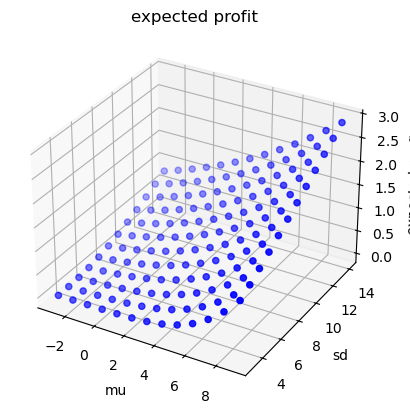

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dframe["mu"], dframe["sd"], dframe["expected_profit"], c='blue', marker='o')

ax.set_xlabel("mu")
ax.set_ylabel("sd")
ax.set_zlabel("expected profit")
ax.set_title("expected profit")
plt.savefig("profit.png")
plt.show()
